# Random sampling

https://numpy.org/doc/1.16/reference/routines.random.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Simple random data

### Discrete Uniform Distribution

https://numpy.org/doc/1.16/reference/generated/numpy.random.randint.html

[1 3 3 4 2 1 2 3 0 2 2 2 0 0 2 2 1 0 0 1 0 4 4 3 0 3 1 4 1 2 4 4 4 3 2 3 3
 2 1 1 0 2 4 4 2 1 4 2 0 2 3 0 0 1 0 4 4 1 0 2 0 1 2 4 3 2 3 2 3 0 4 3 1 1
 1 0 3 2 4 3 1 3 4 0 2 0 3 1 3 2 3 2 2 3 1 3 1 1 0 4]


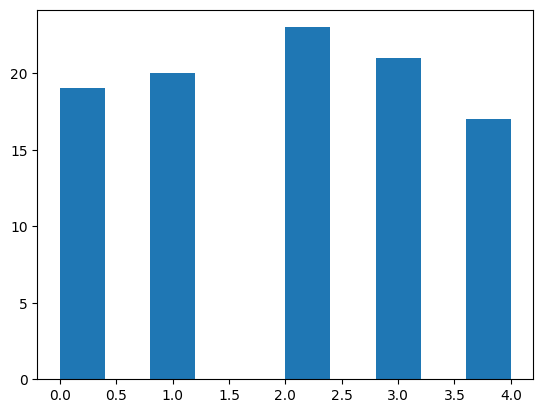

In [2]:
# Return random integers from low (inclusive) to high (exclusive)

random_objects = np.random.randint(low=0, high=5, size=100)
print(random_objects)

plt.hist(random_objects)

plt.show()
plt.close()

### Uniform Distribution

https://numpy.org/doc/1.16/reference/generated/numpy.random.uniform.html

\begin{align}
p(x) = \frac{1}{b -a}
\end{align}


s:  (1000,) [0.64920075 0.78996787 0.14283465 0.4332323  0.69141249 0.69121822
 0.7604907  0.73792761 0.07754027 0.38837858]
mean:  0.49805473957405527
width:  1
height:  1.0
area:  1.0


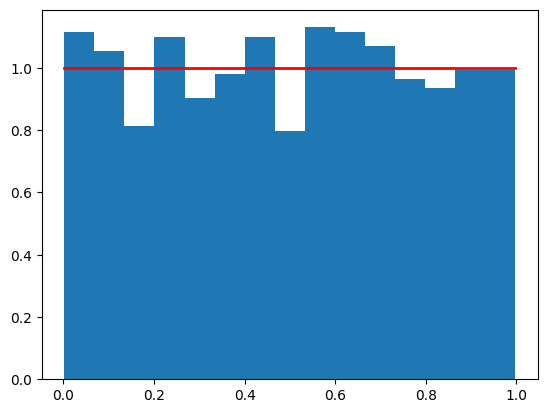

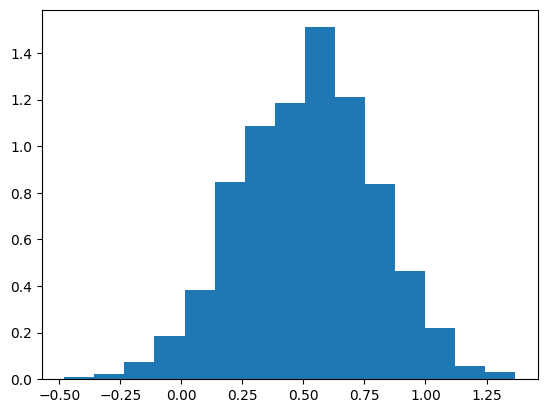

In [3]:
b, a = 1, 0 # high, low
s = np.random.uniform(low=a, high=b, size=1000)
print('s: ', s.shape, s[0:10])
print('mean: ', np.mean(s))

count, bins, ignored = plt.hist(s, 15, density=True)

# Probability density function (PDF) for the uniform distribution
pdf_values = np.ones_like(bins) / (b - a)  # Using the formula for the PDF

# area under the curve equals 1
width = b - a
height = 1/(b - a)
area = width * height
print('width: ', width)
print('height: ', height)
print('area: ', area)

plt.plot(bins, pdf_values, linewidth=2, color='r')
plt.show()
plt.close()

data_normal = np.random.normal(loc=np.mean(s), scale=np.std(s), size=1000)
count, bins, ignored = plt.hist(data_normal, 15, density=True)

plt.show()
plt.close()

### Choice

https://numpy.org/doc/1.16/reference/generated/numpy.random.choice.html

p : 1-D array-like, optional <br>
The probabilities associated with each entry in a. If not given the sample assumes a uniform distribution over all entries in a.

In [4]:
print("Choose 2 values from 0 to 4: ", np.random.choice(5, size=2))
print("Choose 2 values from the list: ", np.random.choice(["Gyan", "is", "the", "great"], size=2))
print("Choose 2 values from 0 to 1 without replacement: ", np.random.choice(2, size=2, replace=False))

elements = ['one', 'two', 'three']
weights = [0.2, 0.3, 0.5]
print("Choose elements with probabilities: ", np.random.choice(elements, p=weights))

Choose 2 values from 0 to 4:  [0 1]
Choose 2 values from the list:  ['is' 'is']
Choose 2 values from 0 to 1 without replacement:  [1 0]
Choose elements with probabilities:  three


## Distributions

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html#distributions

### Binomial

https://numpy.org/doc/1.16/reference/generated/numpy.random.binomial.html<br>
https://www.w3schools.com/python/numpy/numpy_random_binomial.asp

Binomial Distribution is a Discrete Distribution.<br>
It describes the outcome of binary scenarios, e.g. toss of a coin, it will either be head or tails.<br>

It has three parameters:<br>
n - number of trials.<br>
p - probability of occurence of each trial (e.g. for toss of a coin 0.5 each).<br>
size - The shape of the returned array.

(10000,)
[6 3 4 ... 6 5 6]
Sum of freq:  999.4


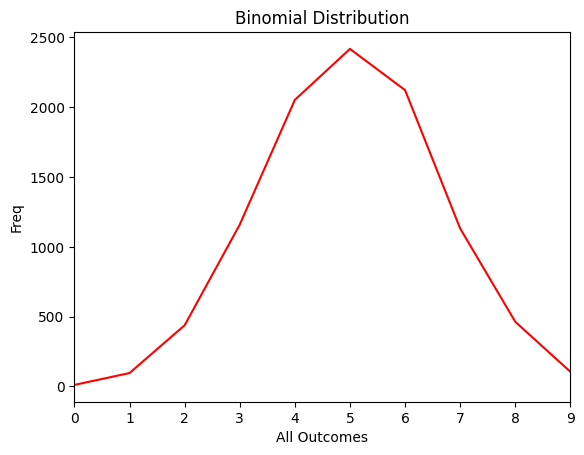

In [5]:
# Draw samples from a binomial distribution.

# number of trials, probability of success for each trial, size
trials, probability, test = 10, .5, 10000
outcomes = np.random.binomial(trials, probability, test)
print(outcomes.shape)
print(outcomes)

all_outcome = range(trials)
freq = np.zeros(trials)
for outcome in all_outcome:
    for a_outcome in outcomes:
        if outcome == a_outcome:
            freq[outcome] += 1

print("Sum of freq: ", np.mean(freq))

plt.plot(all_outcome, freq, 'r')
plt.title("Binomial Distribution")
plt.xlabel('All Outcomes')
plt.ylabel('Freq')
plt.xlim([0, trials-1])
plt.show()

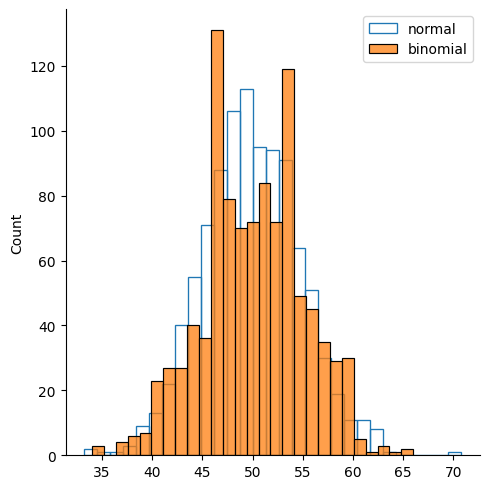

In [6]:
# Difference Between Normal and Binomial Distribution
# The main difference is that normal distribution is continous whereas binomial is discrete,
# but if there are enough data points it will be quite similar to normal distribution with certain loc and scale.

data_normal = np.random.normal(loc=50, scale=5, size=1000)
data_binomial = np.random.binomial(n=100, p=0.5, size=1000)

# Plot both distributions on the same graph
sns.displot(data_normal, label='normal', fill=False)
sns.histplot(data_binomial, label='binomial', kde=False)  # Use kde=False to omit the kernel density plot

# Add legend
plt.legend()

# Show the plot
plt.show()

### Bernoulli distribution

https://www.wikiwand.com/en/Bernoulli_distribution

The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted (so n would be 1 for such a binomial distribution).
A Bernoulli distribution is a discrete probability distribution that models a binary outcome, such as success or failure.
It is characterized by a single parameter p, which represents the probability of success.

If X is a random variable with a Bernoulli distribution, then:

\begin{align}
\Pr(X=1)=p=1-\Pr(X=0)=1-q.
\end{align}

The probability mass function f of this distribution, over possible outcomes k, is

\begin{align}
f(k;p)={\begin{cases}p&{\text{if }}k=1,\\q=1-p&{\text{if }}k=0.\end{cases}}
\end{align}

This can also be expressed as

\begin{align}
f(k;p)=p^{k}(1-p)^{1-k}\quad {\text{for }}k\in \{0,1\}
\end{align}

or as
\begin{align}
f(k;p)=pk+(1-p)(1-k)\quad {\text{for }}k\in \{0,1\}.
\end{align}

Mean
The expected value of a Bernoulli random variable X is

\begin{align}
\operatorname {E} [X]=p
\end{align}

Variance
The variance of a Bernoulli distributed X is

\begin{align}
{Var} [X]=pq=p(1-p)
\end{align}


In [7]:
'''
If you pass n=1 to the Binomial distribution it is equivalent to the Bernoulli distribution.
In this case the function could be thought of simulating coin flips.
size=3 tells it to flip the coin three times and p=0.5 makes it a fair coin with equal probabilitiy of head (1) or tail (0).
The result of [1 0 0] means the coin came down once with head and twice with tail facing up.
This is random, so running it again would result in a different sequence like [1 1 0], [0 1 0], or maybe even [1 1 1].
Although you cannot get the same number of 1s and 0s in three runs, on average you would get the same number.
'''
outcomes = np.random.binomial(n=1, p=0.5, size=3)
print(outcomes.shape)
print(outcomes)

# Decide between 2 outcomes randomly
if np.random.binomial(n=1, p=0.5) == 1:
    print("Success :)")
else:
    print("Fail :(")

(3,)
[1 0 0]
Fail :(


unique_values:  [0 1]
counts:  [417 583]
pmf 1:  [0.417 0.583]
pmf 2:  [0.4, 0.6]
variance:  0.24


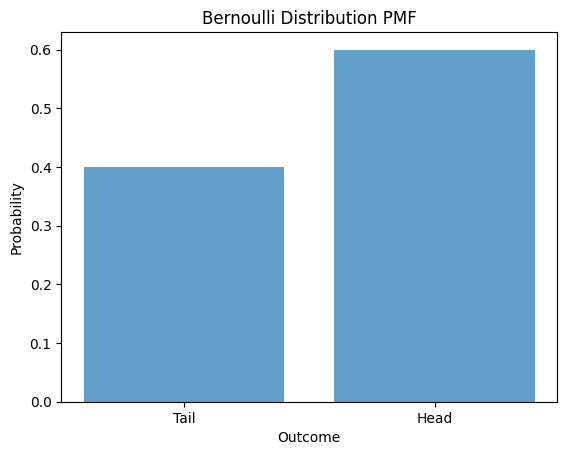

In [8]:
# Parameters
p_success = 0.6  # Probability of success (head)

# Number of trials (number of points in each batch)
trials = 1000

# Simulate Bernoulli distribution using np.random.binomial
samples = np.random.binomial(n=1, p=p_success, size=trials)

# Calculate PMF
unique_values, counts = np.unique(samples, return_counts=True)
pmf = counts / trials
print('unique_values: ', unique_values)
print('counts: ', counts)
print('pmf 1: ', pmf)
pmf = [(p_success ** k) * ((1 - p_success) ** (1 - k)) for k in unique_values]
print('pmf 2: ', pmf)

# Calculate Variance
variance = p_success * (1 - p_success)
print('variance: ', variance)

# Plot PMF
plt.bar(unique_values, pmf, align='center', alpha=0.7)
plt.xticks(unique_values, ['Tail', 'Head'])
plt.title('Bernoulli Distribution PMF')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.show()

### Poisson distribution

https://numpy.org/doc/1.16/reference/generated/numpy.random.poisson.html

Poisson Distribution is a discrete probability distribution and it expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.
It estimates how many times an event can happen in a specified time. e.g. If someone eats twice a day what is the probability he will eat thrice?

A discrete random variable X is said to have a Poisson distribution, with parameter λ>0, if it has a probability mass function (PMF) given by:
\begin{align}
f(k;\lambda )=\Pr(X{=}k)={\frac {\lambda ^{k}e^{-\lambda }}{k!}},
\end{align}

where
k is the number of occurrences (k=0,1,2,...)<br>
e is Euler's number (e=2.71828)<br>
k! = k(k–1) ··· (3)(2)(1) is the factorial.<br>
The positive real number λ is equal to the expected value of X and also to its variance.

\begin{align}
\lambda =\operatorname {E} (X)=\operatorname {Var} (X).
\end{align}

λ is average number of events.<br>
An poisson distribution has mean λ and variance λ.

It has two parameters:<br>
lam - rate or known number of occurrences e.g. 2 for above problem. Expectation of interval, should be >= 0.<br>
size - The shape of the returned array.<br>



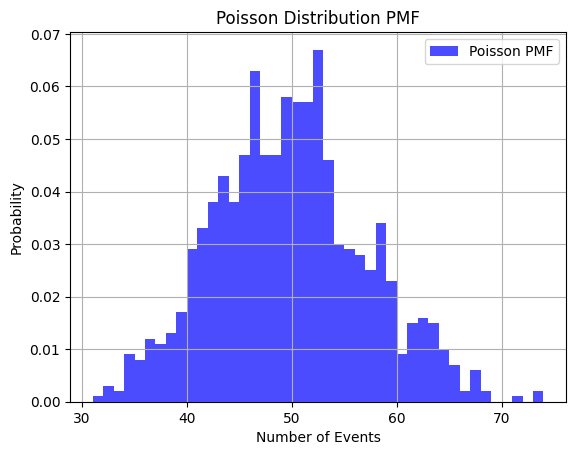

In [9]:
samples = np.random.poisson(lam=50, size=1000)

# sns.displot(samples, label='poisson', fill=False)
# plt.show()

# Create a histogram to approximate the PMF
hist, bins = np.histogram(samples, bins=np.arange(min(samples), max(samples) + 1.5) - 0.5, density=True)

# Plot the PMF
plt.bar(bins[:-1], hist, width=1.0, align='center', alpha=0.7, color='blue', label='Poisson PMF')

# Plot settings
plt.title('Poisson Distribution PMF')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

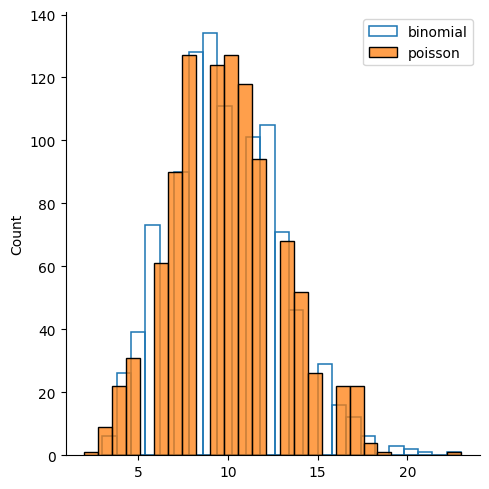

In [11]:
'''
Difference Between Binomial and Poisson Distribution
Binomial distribution only has two possible outcomes, whereas poisson distribution can have unlimited possible outcomes.
But for very large n and near-zero p binomial distribution is near identical to poisson distribution
such that n * p is nearly equal to lam.
'''

data_binomial = np.random.binomial(n=1000, p=0.01, size=1000)
data_poisson = np.random.poisson(lam=10, size=1000)

sns.displot(data_binomial, label='binomial', fill=False)
sns.histplot(data_poisson, label='poisson', kde=False)

plt.legend()
plt.show()

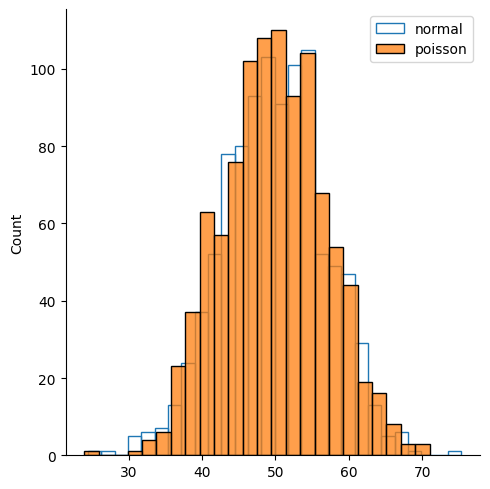

In [10]:
'''
Difference Between Normal and Poisson Distribution
Normal distribution is continuous whereas poisson is discrete.
But we can see that similar to binomial for a large enough poisson distribution
it will become similar to normal distribution with certain std dev and mean.
'''

data_normal = np.random.normal(loc=50, scale=7, size=1000)
data_poisson = np.random.poisson(lam=50, size=1000)

sns.displot(data_normal, label='normal', fill=False)
sns.histplot(data_poisson, label='poisson', kde=False)

plt.legend()
plt.show()

### Normal (Guassian) Distribution

https://numpy.org/doc/1.16/reference/generated/numpy.random.normal.html

\begin{align}
p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }
\end{align}

It has three parameters:<br>
loc (mean/ peak of the bell)<br>
scale (standard deviation/ flatness of the graph)<br>
size (shape of the returned array).<br>

Most of these graphs tend to be bell curved shape. It is continous.
The normal distributions occurs often in nature.

[-0.01162763  0.00225794 -0.04393278 -0.21715065  0.03307279 -0.06473171
  0.046152    0.05219601 -0.02871649 -0.05318716]
True
True
min:  -0.2800139407965998
max:  0.3105568705717479


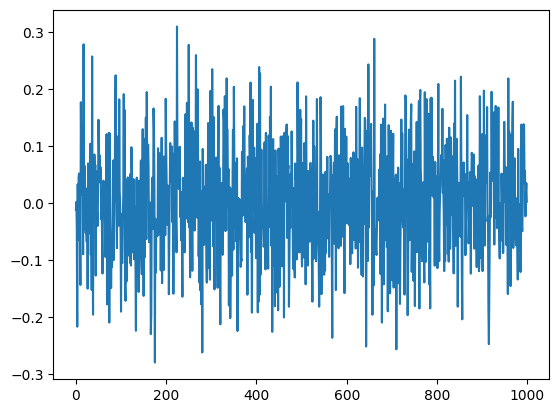

count:  (30,) [0.10159662 0.15239493 0.25399156 0.30478987 0.81277298 0.55878143
 1.37155441 1.3207561  2.18432739 2.79390713 2.89550375 3.35268855
 3.70827673 3.30189024 3.60668011 4.57184803 4.31785647 3.45428518
 2.59071388 1.7779409  2.28592401 1.57474765 1.06676454 1.06676454
 0.55878143 0.35558818 0.15239493 0.10159662 0.15239493 0.05079831]
bins:  (31,) [-0.28001394 -0.26032825 -0.24064255 -0.22095686 -0.20127117 -0.18158547
 -0.16189978 -0.14221408 -0.12252839 -0.1028427  -0.083157   -0.06347131
 -0.04378562 -0.02409992 -0.00441423  0.01527146  0.03495716  0.05464285
  0.07432855  0.09401424  0.11369993  0.13338563  0.15307132  0.17275701
  0.19244271  0.2121284   0.2318141   0.25149979  0.27118548  0.29087118
  0.31055687]


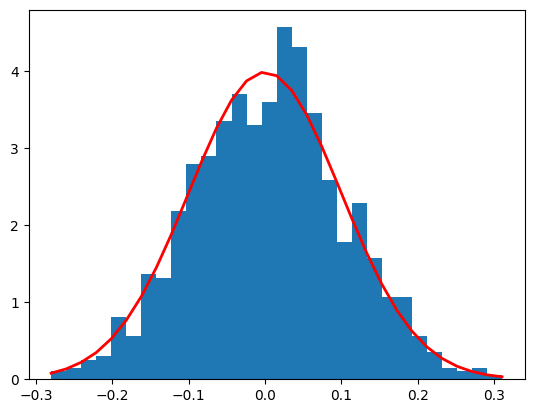

In [12]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

print(s[0:10])

print(abs(mu - np.mean(s)) < 0.01)
print(abs(sigma - np.std(s, ddof=1)) < 0.01)

print('min: ', np.min(s))
print('max: ', np.max(s))

plt.plot(s)
plt.show()
plt.close()

count, bins, ignored = plt.hist(s, bins=30, density=True)
print('count: ', count.shape, count)
print('bins: ', bins.shape, bins)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()
plt.close()

Q) Generate 1000 data points normally distributed, with mean=x, and variance=y.
Perform summary stat on the data points, explain stat metrics. Create density plot.

Mean: 5.036950555924953
Standard Deviation: 1.4511546638213064
Min Value: 0.35571417354666046
Max Value: 11.739620092727161


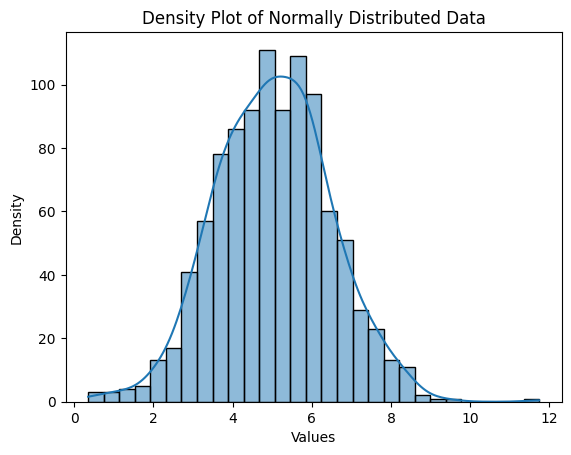

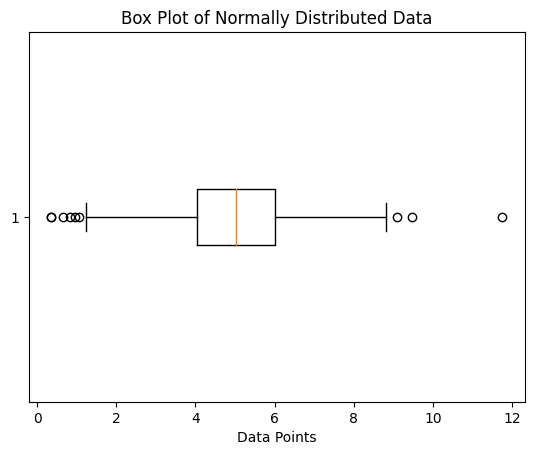

In [16]:
# Set mean and variance
mean_value = 5
variance_value = 2

# Generate 1000 normally distributed data points
data_points = np.random.normal(loc=mean_value, scale=np.sqrt(variance_value), size=1000)

# Summary statistics
mean_value_calculated = np.mean(data_points)
std_deviation_calculated = np.std(data_points)
min_value = np.min(data_points)
max_value = np.max(data_points)

# Print summary statistics
print(f"Mean: {mean_value_calculated}")
print(f"Standard Deviation: {std_deviation_calculated}")
print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")

'''
Mean (Average): The sum of all values divided by the number of values. It represents the central tendency of the data.
Standard Deviation: A measure of the amount of variation or dispersion in a set of values.
A higher standard deviation indicates more spread out data.
Min Value: The minimum value in the dataset.
Max Value: The maximum value in the dataset.
'''

# Create density plot
sns.histplot(data_points, kde=True)
plt.title("Density Plot of Normally Distributed Data")
plt.xlabel("Values")
plt.ylabel("Density")
plt.show()

# Create a box plot
plt.boxplot(data_points, vert=False)  # vert=False for a horizontal box plot
plt.title('Box Plot of Normally Distributed Data')
plt.xlabel('Data Points')
plt.show()